# Practice 1. implement bilinear interpolation with deconvolution

In [2]:
# libraries for plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# libraries for torch
import torch
import torch.nn as nn
import torch.nn.functional as F

### draw input image that have a circle with radius=3 and centered at (5, 5)

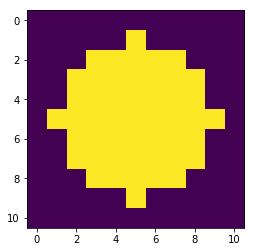

In [4]:
X = torch.zeros(11,11)

# draw a circle by filling ones
cx, cy, r = 5, 5, 4
for i in range(cx-r,cx+r+1):
    for j in range(cy-r, cy+r+1):
        if (i-cx)*(i-cx) + (j-cy)*(j-cy) <= r*r:
            X[j,i] = 1

# showing rectangle
plt.imshow(X)

### simple edge filter

In [5]:
# declare a 2-D convolution filter
Nedge = nn.Conv2d(1,1,3,1,1) # in_channel, out_channel, kernel_size, stride, padding
print(Nedge.weight.size(), Nedge.bias.size()) # model parameter, weight & bias are randomly initialized.

torch.Size([1, 1, 3, 3]) torch.Size([1])


In [6]:
# sobel filter
Fedge = torch.FloatTensor([[1,2,1],[0,0,0],[-1,-2,-1]])/4
Nedge.weight[0,0,:,:] = Fedge
Nedge.bias[0] = 0

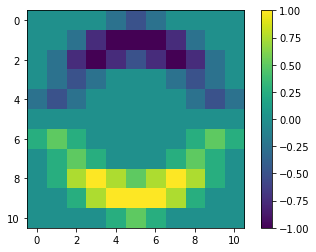

In [7]:
# make 4-D tensor
Xt = X.unsqueeze(0)
Xt.unsqueeze_(0)

Yt = Nedge.forward(Xt)

Y = Yt.squeeze()
plt.imshow(Y.detach())
plt.colorbar()

### bilinear interpolation in pytorch

In [99]:
Xu = F.upsample(Xt, scale_factor=32, mode='bilinear', align_corners=True)
Yu = F.upsample(Yt, scale_factor=32, mode='bilinear', align_corners=True)

/home/tackgeun/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [93]:
print(Yt.size(), Yu.size())

torch.Size([1, 1, 11, 11]) torch.Size([1, 1, 352, 352])


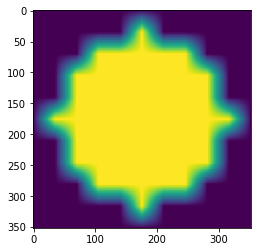

In [100]:
plt.imshow(Xu.squeeze().detach())

### Implement bilinear interpolation with deconvolution
- https://en.wikipedia.org/wiki/Bilinear_interpolation

In [ ]:
Nbi = nn.ConvTranspose2d(1,1,64,32)

In [14]:
Fbi = torch.zeros(64,64)

In [ ]:
# F = A B
#     C D

# implement F

# For example, A
for j in range(0,32):
    for i in range(0, 32):
        Fbi[j,i] = 1 